# ***Inversion of Dirac Matrix***

*   Authors: *Dhruv Patel and Anselem Okeke*
*   Matriculation no.'s: *2130292 and 1943585*
*   Subject: *Introduction to Computer Simulation II*
*   Semester: *Winter Term 2022/2023*
*   Date: *30th January, 2023*

---------

In [ ]:
# importing essential functions

import numpy as np
import math
import matplotlib.pylab as plt

In [ ]:
# function definition for returning the neighbour elements
def GetElement(i, j, Matrix, m, n):
  return Matrix[i % m][j % n]

In [ ]:
# function definition for kronecker delta
def kronecker_delta(i, j):
  if i == j:
    x = 1
  else:
    x = 0

  return x

In [ ]:
# function definition for evaluating matrix D,
# and the product of matrix with unit vector
def func(v, a, D):
  p = len(v)
  q = int(math.sqrt(n))

  for j in range(1, m+1):
    for i in range(1, m+1):
      p = (i + (j - 1) * m) - 1

      if (i == j):
        D[p][p] = 0.4   # given value: m = 0.4

      if (a[0][p] != 0):
        D[p][a[0][p]-1] = (((-1)^i) /2) * kronecker_delta(i+1 , j)

      if (a[1][p] != 0):
        D[p][a[1][p]-1] = (1/2) * kronecker_delta(i, j+1)

      if (a[2][p] != 0):
        D[p][a[2][p]-1] = (-((-1)^i) /2) * kronecker_delta(i-1 , j)

      if (a[3][p] != 0):
        D[p][a[3][p]-1] = (-1/2) * kronecker_delta(i,j-1)

  y = np.dot(D,v)
  return y    # returns the matrix-vector product

In [ ]:
m = 8 # number of horizontal lattice points
n = 8 # number of vertical lattice points

# to generate the matrix for given dimensions
Matrix = [[(j + 1) + m * i for j in range(m)] for i in range(n)]
print("Displaying the generated matrix:")
print(np.matrix(Matrix))
print()

# discretization in 1 + 1 dimensional space time
lat_num = m * n # total number of points in a square lattice

# initializing the neighbour matrix list with NULL values
neigh_mat_top = []
neigh_mat_right = []
neigh_mat_down = []
neigh_mat_left = []

# to evaluate the neigbours (top, right, down, left) for lattice points
for i in range(0, m):
  for j in range(0, n):
    neigh_mat_top.append(GetElement(i - 1, j, Matrix, m, n))
    neigh_mat_right.append(GetElement(i, j + 1, Matrix, m, n))
    neigh_mat_down.append(GetElement(i + 1,j, Matrix, m, n))
    neigh_mat_left.append(GetElement(i, j - 1, Matrix, m, n))

# to create one list for all neighbours
neigh_mat_list = neigh_mat_top + neigh_mat_right + neigh_mat_down + neigh_mat_left

# initialize the neighbour table (matrix) with NULL values
neigh_mat = []
# converting the neibhour list to the matrix format
while neigh_mat_list != []:
  neigh_mat.append(neigh_mat_list[:lat_num])
  neigh_mat_list = neigh_mat_list[lat_num:]

print("Displaying the neighbour's table: ")
print(np.matrix(neigh_mat))
print()

D = np.zeros((64, 64))
x = np.ones(64)

y = func (x, neigh_mat, D)

print("Displaying the Matrix-Vector product: ")
print(y)

Displaying the generated matrix:
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]
 [17 18 19 20 21 22 23 24]
 [25 26 27 28 29 30 31 32]
 [33 34 35 36 37 38 39 40]
 [41 42 43 44 45 46 47 48]
 [49 50 51 52 53 54 55 56]
 [57 58 59 60 61 62 63 64]]

Displaying the neighbour's table: 
[[57 58 59 60 61 62 63 64  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
  17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
  41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]
 [ 2  3  4  5  6  7  8  1 10 11 12 13 14 15 16  9 18 19 20 21 22 23 24 17
  26 27 28 29 30 31 32 25 34 35 36 37 38 39 40 33 42 43 44 45 46 47 48 41
  50 51 52 53 54 55 56 49 58 59 60 61 62 63 64 57]
 [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
  33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
  57 58 59 60 61 62 63 64  1  2  3  4  5  6  7  8]
 [ 8  1  2  3  4  5  6  7 16  9 10 11 12 13 14 15 24 17 18 19 20 21 22 23
  32 25 26 27 28 29 30 31 40 33 34 35 36 37

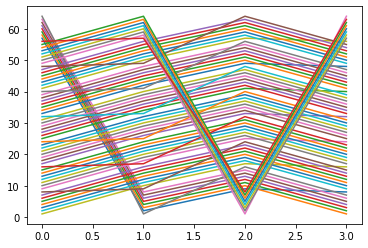

In [ ]:
# plotting the neigbour table (matrix)
plt.plot(neigh_mat)

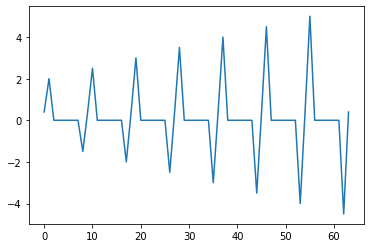

In [ ]:
# plotting the Matrix-Vector product
plt.plot(y)

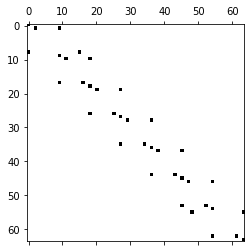

In [ ]:
# plotting the D-matrix
plt.spy(D)

---------